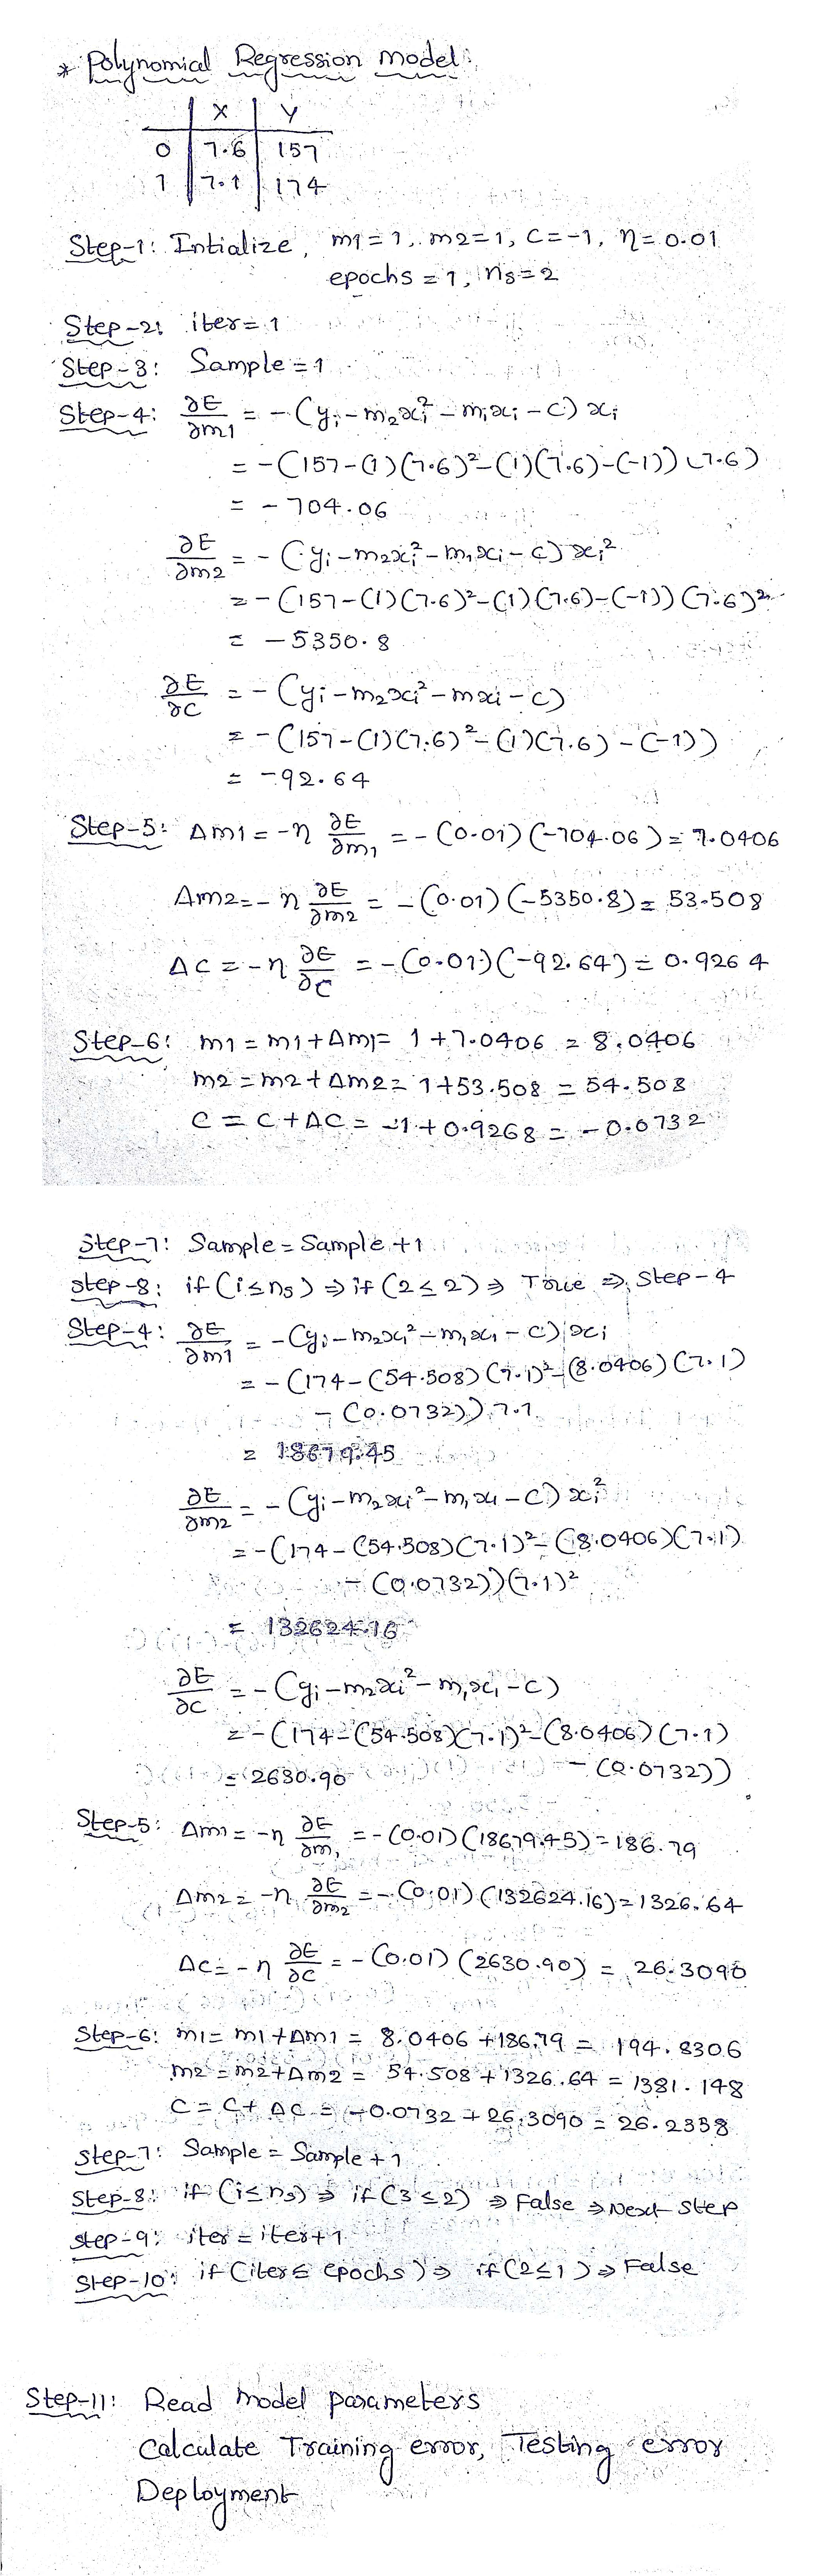

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import math as mt
import random
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data1.csv')
data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [ ]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers # Driver code

In [ ]:
sample_outliers_X = detect_outliers_zscore(data['X'])
sample_outliers_Y = detect_outliers_zscore(data['Y'])
print("Outliers in pH column from Z-scores method: ", sample_outliers_X)
print("Outliers in Bicarbonates column from Z-scores method: ", sample_outliers_Y)

Outliers in pH column from Z-scores method:  []
Outliers in Bicarbonates column from Z-scores method:  []


In [ ]:
from scipy.stats import zscore
zX = np.abs(zscore(data['X']))
zY = np.abs(zscore(data['Y']))
data['ZscoreX'] = zX
data['ZscoreY'] = zY
outliers_X=len(data[data['ZscoreX']>3])
outliers_Y=len(data[data['ZscoreY']>3])
data_z = data[data['ZscoreX']<3]
data=data_z.drop(['ZscoreX', 'ZscoreY'], axis=1)
data

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


In [ ]:
print(data.isnull().sum())

X    0
Y    0
dtype: int64


In [ ]:
m1=data['X'].mean()
m2=data['Y'].mean()
data['X'].fillna(value=m1, inplace=True)
data['Y'].fillna(value=m2, inplace=True)
data

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.X, data.Y, test_size = 0.10, random_state = 10)

In [ ]:
m1=random.uniform(-10,10)
m2=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.0001
max_iter=1000

In [ ]:
def gradient(m1,m2,c,x,y):
  m1_deriv=-1*(y-m1*x*x-m2*x-c)*x*x
  m2_deriv=-1*(y-m1*x*x-m2*x-c)*x
  c_deriv=-1*(y-m1*x*x-m2*x-c)
  return m1_deriv,m2_deriv,c_deriv

In [ ]:
for iter in range(max_iter):
  for sample in range(x_train.shape[0]):
    del_m1,del_m2,del_c=gradient(m1, m2, c, x_train.iloc[sample], y_train.iloc[sample])
    m1=m1-eta*del_m1
    m2=m2-eta*del_m2
    c=c-eta*del_c
print('Model parameters m1, m2 and c : ',m1,m2,c)

Model parameters m1, m2 and c :  -3.7760395218128386 46.48271196809007 8.60565678800993


In [ ]:
y_pred_train = []
for i in x_train:
  y_p_tr = (m1 * i*i)+(m2 * i) + c
  y_pred_train.append(y_p_tr)
y_pred_train = np.array(y_pred_train)

In [ ]:
y_pred_test = []
for i in x_test:
  y_p_te = (m1 * i*i)+(m2 * i) + c
  y_pred_test.append(y_p_te)
y_pred_test = np.array(y_pred_test)

In [ ]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [ ]:
#Training Accuracies
mse = mean_squared_error(y_train, y_pred_train) 
print('Mean Square Error : ', mse) 
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('Root Mean Square Error : ', rmse) 
mae = mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error : ', mae)

Mean Square Error :  2804.8150260812367
Root Mean Square Error :  52.96050439791181
Mean Absolute Error :  44.52257451058222


In [ ]:
#Testing Accuracies
mse = mean_squared_error(y_test, y_pred_test)
print('Mean Square Error : ', mse)
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('Root Mean Square Error : ', rmse)  
mae = mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error : ', mae)

Mean Square Error :  2990.1166992755416
Root Mean Square Error :  54.68195954129242
Mean Absolute Error :  48.00598207767525


In [ ]:
x = input("Enter pH Value of Water : ")
y = m1*float(x)*float(x)+m2*float(x)+c
print("Bicarbonates Value of Water : ", y)

Enter pH Value of Water : 5.9
Bicarbonates Value of Water :  151.40972164543646
